# Health Insurance Prediction

## Importing Necessary Libraries

These are some of the important packages which we need despite of the project. These are like some of the basic and powerful packages which halps to make the life of a person performing Data Analysis and Preprocessing easier. Below is the explanation of those packages and their uses.



1.   pandas :  Pandas a python library, used for Exploratory Data Analysis like data manipulation, data cleaning, data extraction etc.
2. numpy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.text
3. matplotlib.pyplot:Matplotlib library, is used in Python for visualisations.
4. %matplotlib inline: Allows Matplotlib generated plots to be displayed within the Jupyter Notebook.




In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline

In [42]:
# Load the CSV file
df_i = pd.read_csv('..\Insurance-Prediction\data\health_insurance.csv')
# Display the data
print(df_i.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In order to play with the data, initial step is to have Data. And this is what we are doing here. We are importing a package called pandas which helps us here to read a '.csv' file. We have our data in this format, and it is not a restriction to have it in this specific way. Using the 'pd.read_csv()' function, combined with the path of the dataset, we can load our dataset here.

Here, we are loading it into 'df_i'.

And using the '.head() function, we can print the first 5 rows of our dataset. We can alternatively use the '.tail()' function to print the bottom 5 rows of our dataset.

## Data Exploration

In [43]:
from ydata_profiling import ProfileReport

In [44]:
profile = ProfileReport(df_i, title='Health Insurance Data Profile Report', explorative=True)
profile.to_notebook_iframe()
profile.to_file("ProfileReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Wrangling

In [45]:
#converting sex column title to gender for further usage
df_i.rename(columns={'sex': 'gender'}, inplace=True)
df_i.head()

age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [46]:
df_i['gender'] = df_i['gender'].map({'male': 0, 'female': 1})
df_i.head()

age  gender     bmi  children smoker     region      charges
0   19       1  27.900         0    yes  southwest  16884.92400
1   18       0  33.770         1     no  southeast   1725.55230
2   28       0  33.000         3     no  southeast   4449.46200
3   33       0  22.705         0     no  northwest  21984.47061
4   32       0  28.880         0     no  northwest   3866.85520

In [47]:
df_i['smoker'] = df_i['smoker'].map({'yes': 1, 'no': 0})
df_i.head()

age  gender     bmi  children  smoker     region      charges
0   19       1  27.900         0       1  southwest  16884.92400
1   18       0  33.770         1       0  southeast   1725.55230
2   28       0  33.000         3       0  southeast   4449.46200
3   33       0  22.705         0       0  northwest  21984.47061
4   32       0  28.880         0       0  northwest   3866.85520

In [48]:
df_i["region"]  = df_i['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
df_i.head()

age  gender     bmi  children  smoker  region      charges
0   19       1  27.900         0       1       1  16884.92400
1   18       0  33.770         1       0       2   1725.55230
2   28       0  33.000         3       0       2   4449.46200
3   33       0  22.705         0       0       3  21984.47061
4   32       0  28.880         0       0       3   3866.85520

In [49]:
df_i.corr()

age    gender       bmi  children    smoker    region   charges
age       1.000000  0.022994  0.117031  0.158025  0.101440  0.015817  0.526532
gender    0.022994  1.000000 -0.014280  0.024328 -0.011078 -0.007188 -0.034718
bmi       0.117031 -0.014280  1.000000  0.097577  0.074495 -0.072862  0.206219
children  0.158025  0.024328  0.097577  1.000000  0.072852 -0.017795  0.284610
smoker    0.101440 -0.011078  0.074495  0.072852  1.000000  0.000438  0.472817
region    0.015817 -0.007188 -0.072862 -0.017795  0.000438  1.000000  0.024641
charges   0.526532 -0.034718  0.206219  0.284610  0.472817  0.024641  1.000000

In [50]:
#gender can be refilled, others can be dropped as it will not affect the dataset based on the count of rows
df_i['gender'] = df_i['gender'].fillna(df_i['gender'].mode()[0]).astype(int)
df_i.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
df_i.dropna(inplace=True)

In [52]:
df_i.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
#create a new column for grouping based on age-bins
def func_adult_group(df):
    age_bins = [18, 32, 48, 88]
    age_labels = ['young', 'middle-aged', 'old']


    df_i['adult_group'] = df_i['age'].apply(lambda x: age_labels[0] if x < age_bins[1] else (age_labels[1] if x < age_bins[2] else age_labels[2]))

    return df

#running the function
df_i = func_adult_group(df_i)
df_i.head()

age  gender     bmi  children  smoker  region      charges  adult_group
0   19       1  27.900         0       1       1  16884.92400        young
1   18       0  33.770         1       0       2   1725.55230        young
2   28       0  33.000         3       0       2   4449.46200        young
3   33       0  22.705         0       0       3  21984.47061  middle-aged
4   32       0  28.880         0       0       3   3866.85520  middle-aged

In [54]:
#columns: 'age', 'children', 'smoker' to integer and 'bmi', 'charges' to 2 decimal place
convert_to_int = lambda x: int(float(x))
convert_to_decimal = lambda x: round(float(x), 2)

df_i[['age', 'children', 'smoker','region']] = df_i[['age', 'children', 'smoker', 'region']].applymap(convert_to_int)
df_i[['bmi', 'charges']] = df_i[['bmi', 'charges']].applymap(convert_to_decimal)

In [55]:
df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group
0   19       1  27.90         0       1       1  16884.92        young
1   18       0  33.77         1       0       2   1725.55        young
2   28       0  33.00         3       0       2   4449.46        young
3   33       0  22.70         0       0       3  21984.47  middle-aged
4   32       0  28.88         0       0       3   3866.86  middle-aged

In [56]:
#testing vlaues of new column : adult-group
dummy_values = [19, 26, 37, 43, 55, 65]
for value in dummy_values:
    print('For age',value)
    print('The adult group is:',df_i.loc[df_i['age'] == value, 'adult_group'].iloc[0])

For age 19
The adult group is: young
For age 26
The adult group is: young
For age 37
The adult group is: middle-aged
For age 43
The adult group is: middle-aged
For age 55
The adult group is: old
For age 65
The adult group is: old


BMI is used to broadly define different weight groups in adults 20 years old or older.

* Underweight: BMI is less than 18.5
* Normal weight: BMI is 18.5 to 24.9
* Overweight: BMI is 25 to 29.9
* Obese: BMI is 30 or more

In [57]:
df_i["bmi_weight_label"] = np.nan
list_df_weight = [df_i]

for val in list_df_weight:
    val.loc[val["bmi"] < 18.5, "bmi_weight_label"] = "Underweight"
    val.loc[(val["bmi"] >= 18.5) & (val["bmi"] < 24.986), "bmi_weight_label"] = "Normal Weight"
    val.loc[(val["bmi"] >= 25) & (val["bmi"] < 29.926), "bmi_weight_label"] = "Overweight"
    val.loc[val["bmi"] >= 30, "bmi_weight_label"] = "Obese"

df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92        young   
1   18       0  33.77         1       0       2   1725.55        young   
2   28       0  33.00         3       0       2   4449.46        young   
3   33       0  22.70         0       0       3  21984.47  middle-aged   
4   32       0  28.88         0       0       3   3866.86  middle-aged   

  bmi_weight_label  
0       Overweight  
1            Obese  
2            Obese  
3    Normal Weight  
4       Overweight

In [58]:
obAvg = df_i["charges"].loc[df_i["bmi_weight_label"] == "Obese"].mean()

df_i["charge_average"] = np.where(df_i["charges"] > obAvg, "Above Avg", "Below Avg")
df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92        young   
1   18       0  33.77         1       0       2   1725.55        young   
2   28       0  33.00         3       0       2   4449.46        young   
3   33       0  22.70         0       0       3  21984.47  middle-aged   
4   32       0  28.88         0       0       3   3866.86  middle-aged   

  bmi_weight_label charge_average  
0       Overweight      Below Avg  
1            Obese      Below Avg  
2            Obese      Below Avg  
3    Normal Weight      Below Avg  
4       Overweight      Below Avg

### Adding Stress Level
*  BMI + Children / Age

In [59]:
df_i["stress"] = df_i["children"] * df_i["age"] / df_i["bmi"]

df_i.head()

age  gender    bmi  children  smoker  region   charges  adult_group  \
0   19       1  27.90         0       1       1  16884.92        young   
1   18       0  33.77         1       0       2   1725.55        young   
2   28       0  33.00         3       0       2   4449.46        young   
3   33       0  22.70         0       0       3  21984.47  middle-aged   
4   32       0  28.88         0       0       3   3866.86  middle-aged   

  bmi_weight_label charge_average    stress  
0       Overweight      Below Avg  0.000000  
1            Obese      Below Avg  0.533017  
2            Obese      Below Avg  2.545455  
3    Normal Weight      Below Avg  0.000000  
4       Overweight      Below Avg  0.000000

## DATA VISUALISATION

**Scatter Plots**

Explore the relationship between age and charges using a regression plot

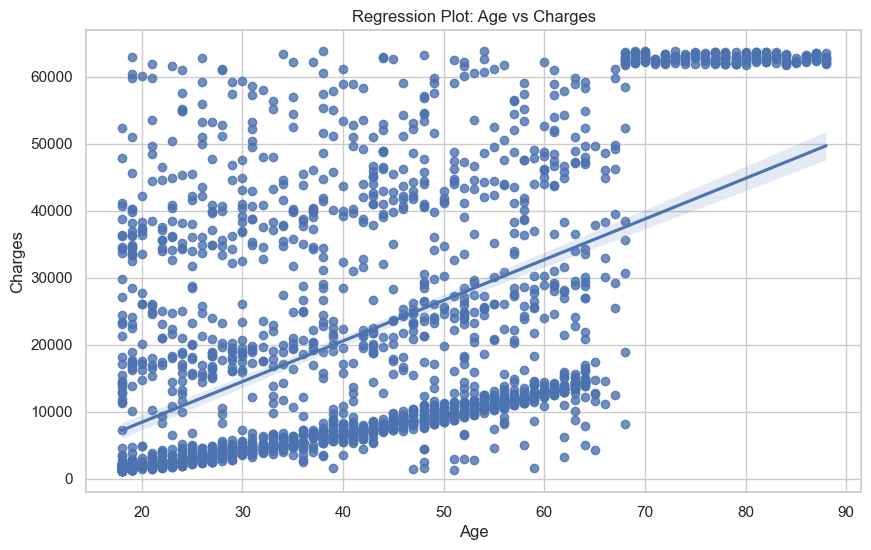

In [60]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df_i)
plt.title('Regression Plot: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


In [61]:
# as the age group above 70 have values that would lead to biasness, we would drop the rows above age 70
df_i = df_i[df_i['age'] <= 70]

The pairplot for "age," "bmi," and "charges" that has the "smoker" colour enables a visual examination of the differences in the associations between these variables between smokers and non-smokers. It facilitates the identification of probable variations in the two gro#ups' ages, BMIs, and charges:

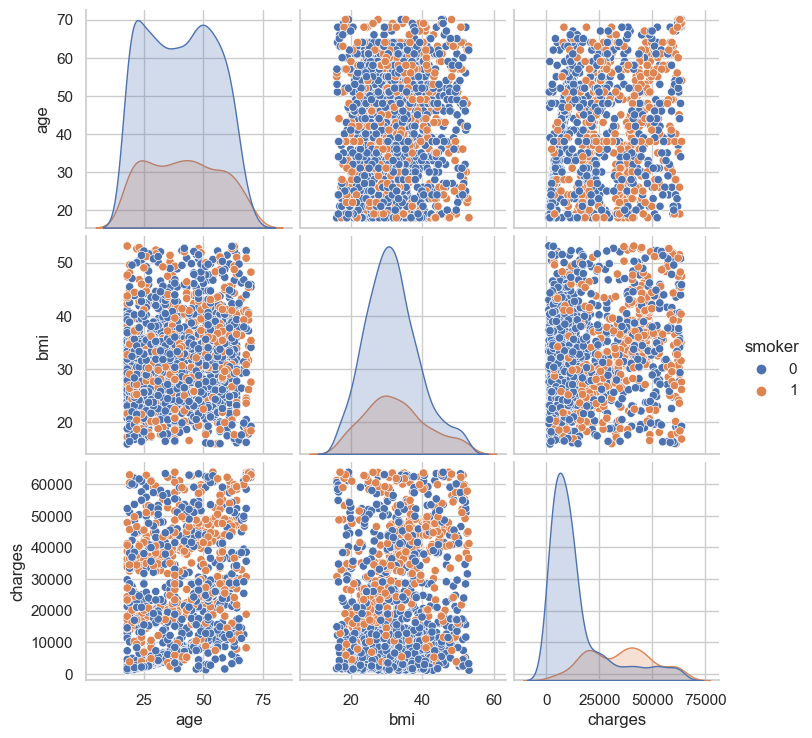

In [62]:
sns.pairplot(df_i, hue='smoker', vars=['age', 'bmi', 'charges'])
plt.show()

This code creates a scatter plot visualizing the connection between BMI and insurance charges. Points are color-coded by stress levels (viridis palette), and the size represents age. The legend in the upper right corner indicates stress levels. This plot helps identify patterns and relationships among BMI, charges, and stress.

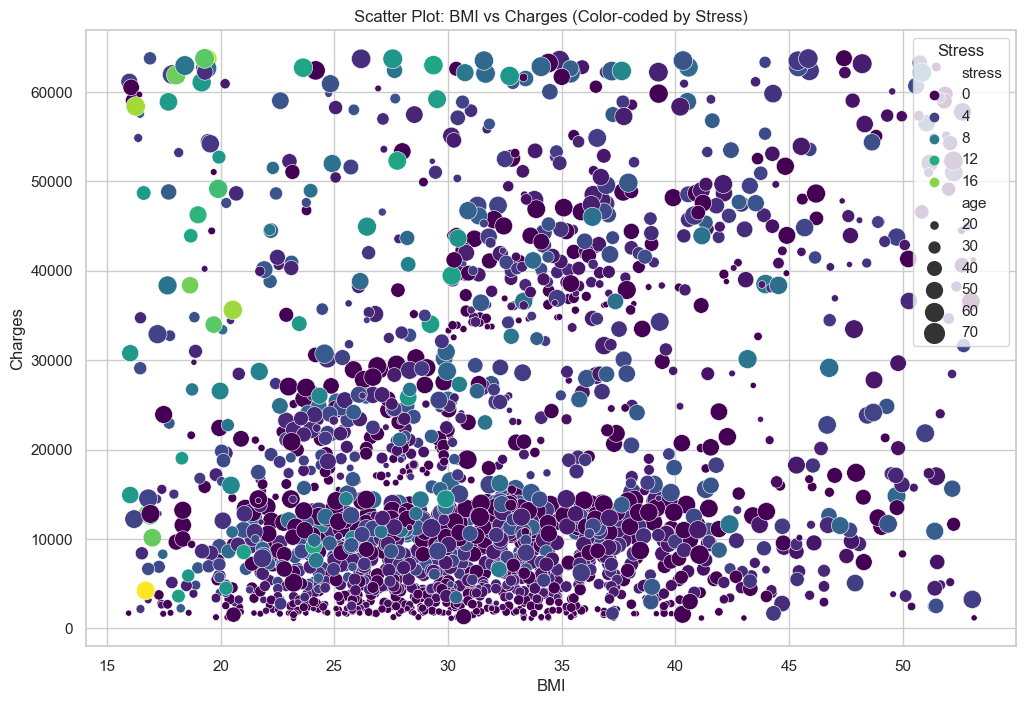

In [63]:
# Scatter plot for BMI vs Charges with color-coded Stress levels
plt.figure(figsize=(12, 8))
sc = sns.scatterplot(x='bmi', y='charges', hue='stress', data=df_i, palette='viridis', size='age', sizes=(20, 200))
plt.title('Scatter Plot: BMI vs Charges (Color-coded by Stress)')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Add a legend
plt.legend(title='Stress', loc='upper right')

plt.show()

BMI vs Charges by Adult Groups:
This code introduces a stress metric calculated as the sum of BMI and the ratio of children to age. A scatter plot is generated to see the relationship between BMI and insurance charges. The points are color-coded based on adult groups using a viridis color palette.
The plot provides insights into potential correlations between BMI, charges, and adult groups, helps in understanding how these factors interact within the dataset.

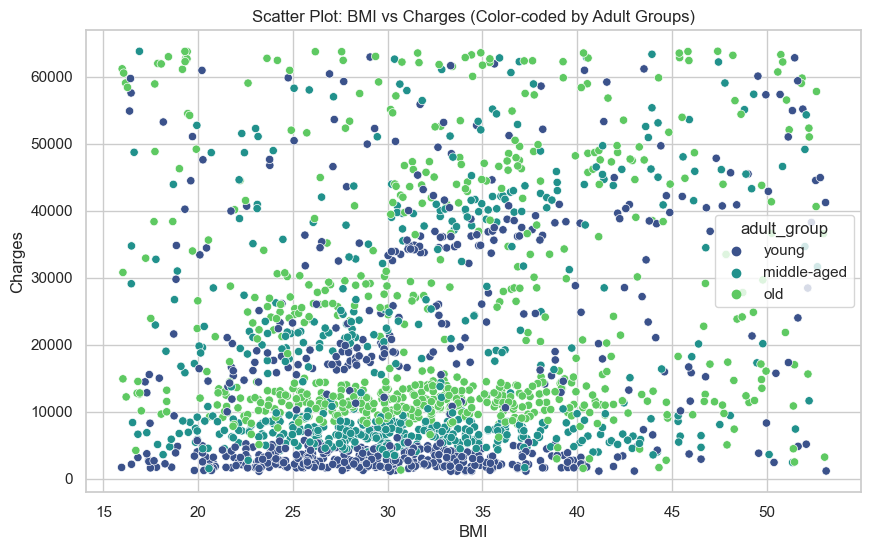

In [64]:

# Calculate stress metric
df_i['stress'] = df_i['bmi'] + df_i['children'] / df_i['age']

# Scatter plot for BMI vs Charges with color-coded Adult Groups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='adult_group', data=df_i, palette='viridis')
plt.title('Scatter Plot: BMI vs Charges (Color-coded by Adult Groups)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

**PIE CHART**

This code generates a 2x2 grid of pie charts representing key categorical distributions in the dataset:

Smoker Status:

Percentage breakdown of smokers and non-smokers.
Number of Children:

Distribution of individuals based on the number of children.
Age Groups:

Proportion of individuals in different age groups (young, middle-aged, old).
BMI Weight Labels:

Percentage distribution across BMI weight categories (Underweight, Normal Weight, Overweight, Obese).
Each pie chart provides a quick visual summary of categorical patterns in the data.

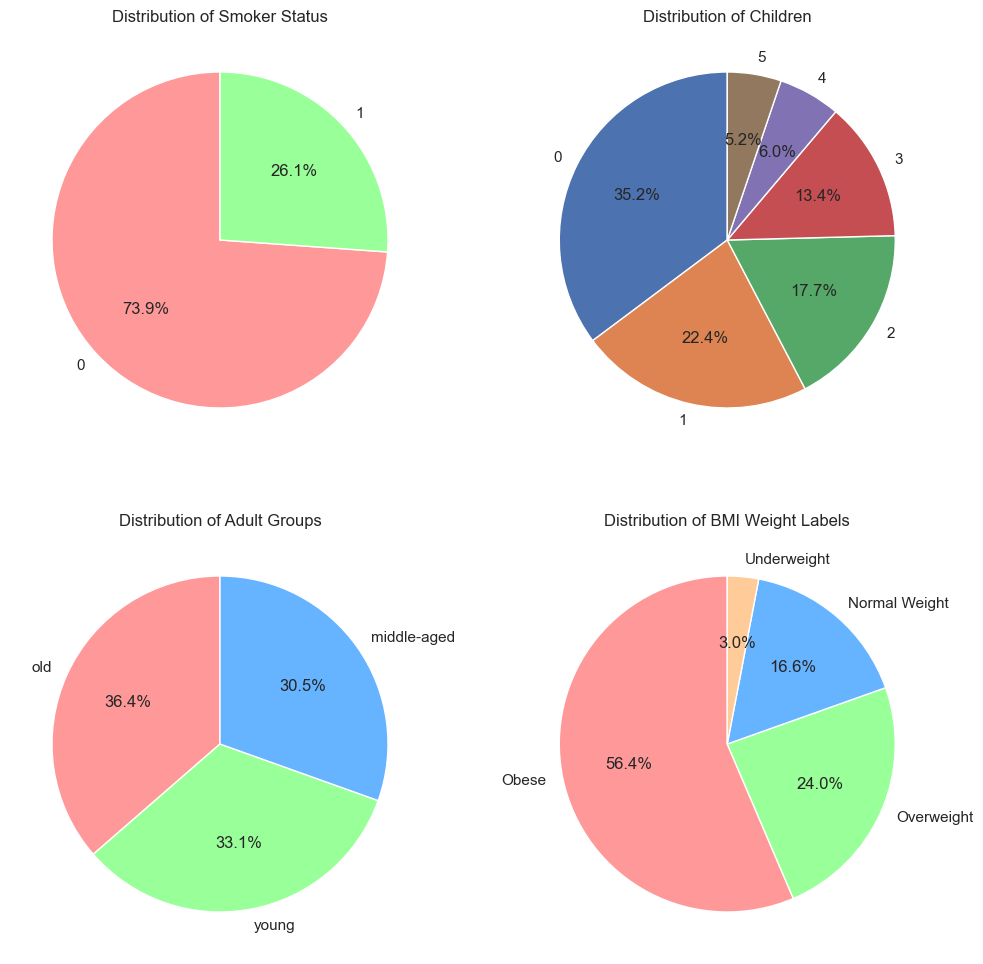

In [65]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Pie chart for Smoker status
smoker_counts = df_i['smoker'].value_counts()
axes[0, 0].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#99ff99'])
axes[0, 0].set_title('Distribution of Smoker Status')

# Pie chart for Children
children_counts = df_i['children'].value_counts()
axes[0, 1].pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribution of Children')

# Pie chart for Adult Group
adult_group_counts = df_i['adult_group'].value_counts()
axes[1, 0].pie(adult_group_counts, labels=adult_group_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#99ff99', '#66b3ff'])
axes[1, 0].set_title('Distribution of Adult Groups')

# Pie chart for BMI Weight Label
bmi_weight_counts = df_i['bmi_weight_label'].value_counts()
axes[1, 1].pie(bmi_weight_counts, labels=bmi_weight_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#99ff99', '#66b3ff', '#ffcc99'])
axes[1, 1].set_title('Distribution of BMI Weight Labels')

plt.show()

BAR PLOT

Using a bar plot in this code helps visualize the relationship between the number of children (categorical data) and the charges (numerical data) while distinguishing between smokers and non-smokers (via the 'hue' parametereter).

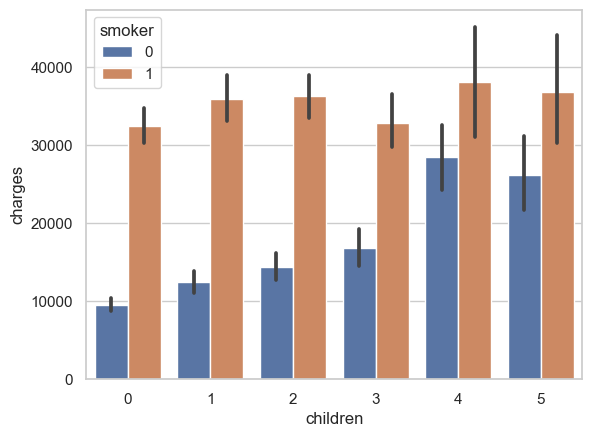

In [66]:
#This code creates a bar plot to visualize how the number of children (x-axis) influences insurance premium charges (y-axis), with differentiation by smoker status (hue).
sns.barplot(x='children', y='charges', data=df_i, hue='smoker')
plt.show()

The countplot displays the distribution of smoker and non-smoker adults in different age groups, allowing analysis of the relationship between smoking status and age group within the dataset.

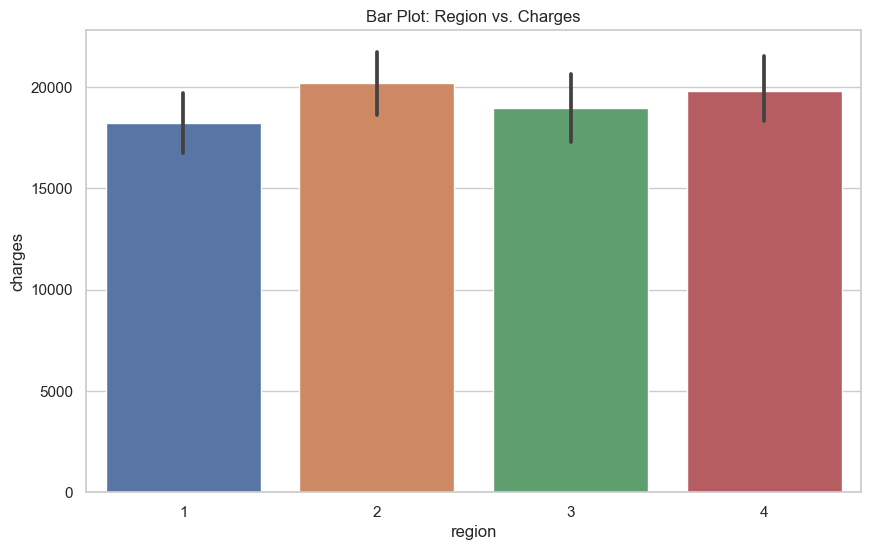

In [67]:
# # Combine the region columns to create a new 'region' column
# df_i['region'] = df_i[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1).str.replace('region_', '')

# Set the style of Seaborn plots (optional)
sns.set(style="whitegrid")

# Bar plot for Region and Charges
plt.figure(figsize=(10, 6))
sns.barplot(data=df_i, x="region", y="charges")
plt.title("Bar Plot: Region vs. Charges")
plt.show()

**BOX PLOT**

This box plot is used to visually compare the distribution, central tendencies, and potential outliers of numerical variables in 's_col' for effective exploratory data analysis.


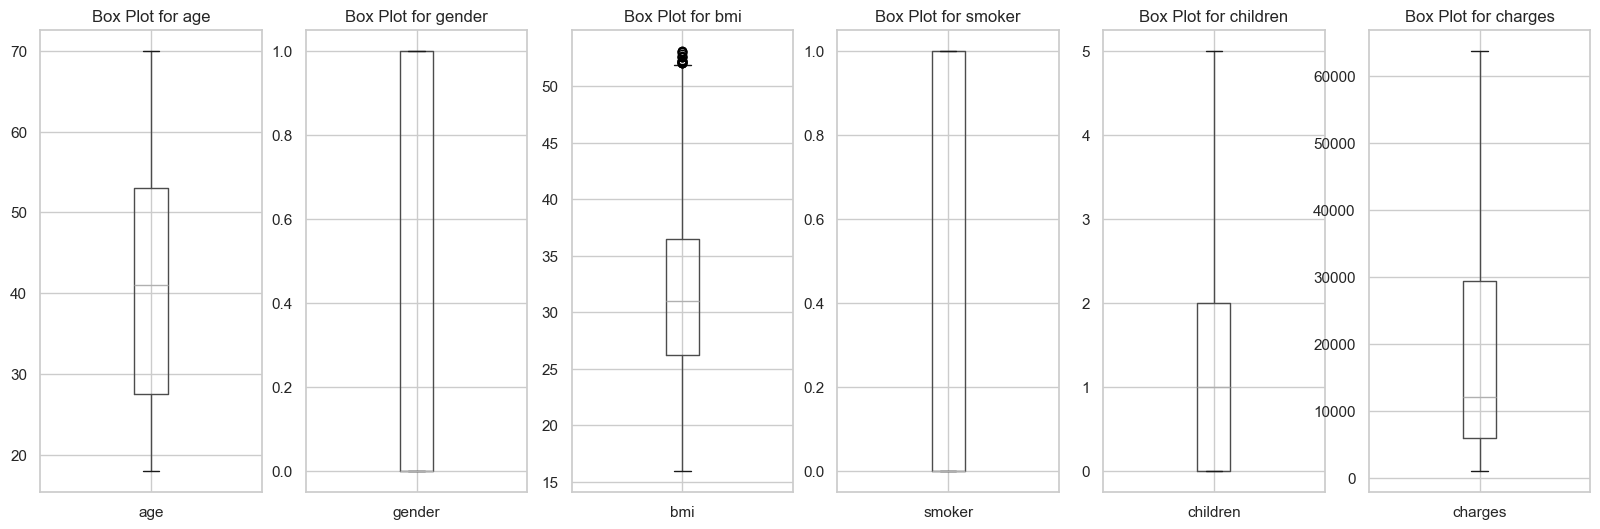

In [68]:
# Define a list of columns to create box plots for
s_col = ['age', 'gender', 'bmi', 'smoker', 'children', 'charges']
# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(s_col), figsize=(20, 6))
# Iterate through the list of columns and create box plots for each
for i, column in enumerate(s_col):
    df_i.boxplot(column, ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')
# Display the entire set of box plots
plt.show()


Distribution of Charges by Smoker Status:
Exploring how charges vary between smokers and non-smokers

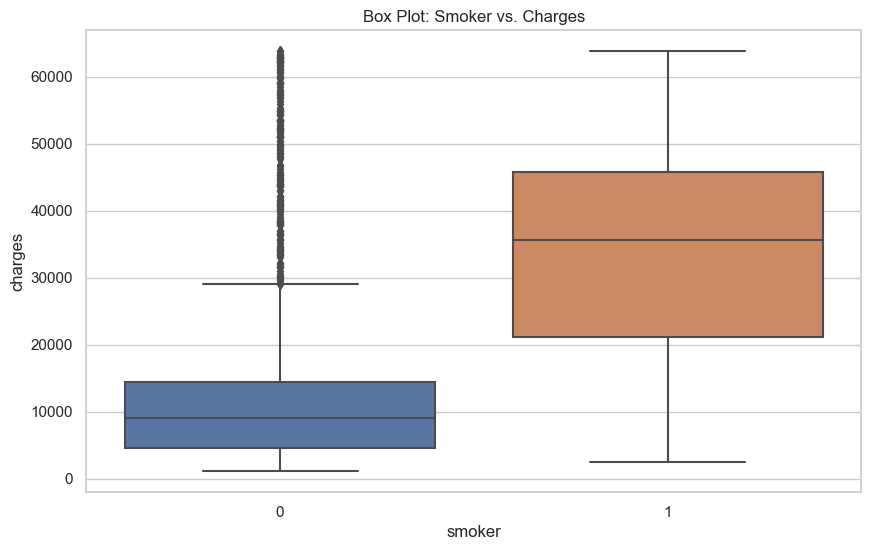

In [69]:
# Box plot for Smoker and Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_i, x="smoker", y="charges")
plt.title("Box Plot: Smoker vs. Charges")
plt.show()

Distribution of Charges by Gender:
Exploring how charges vary between different genders

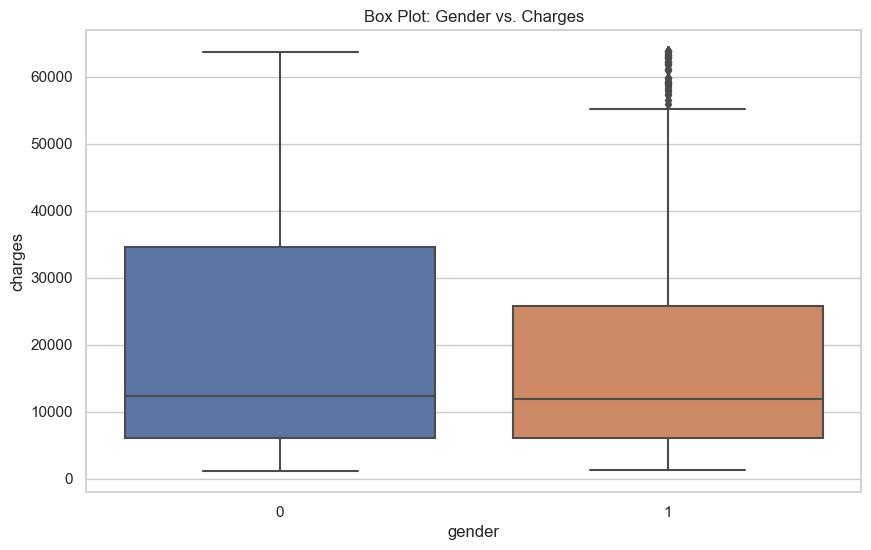

In [70]:
# Box plot for Gender and Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_i, x="gender", y="charges")
plt.title("Box Plot: Gender vs. Charges")
plt.show()

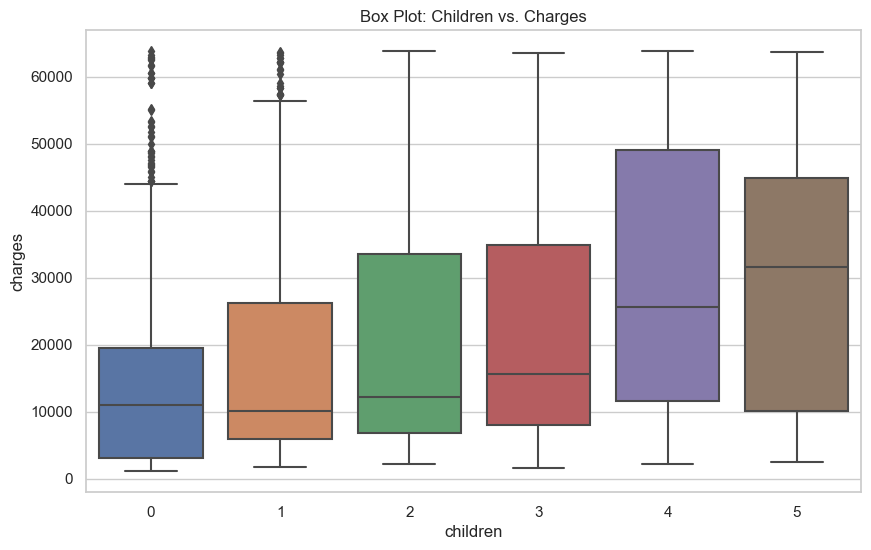

In [71]:
# Box plot for Children and Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_i, x="children", y="charges")
plt.title("Box Plot: Children vs. Charges")
plt.show()

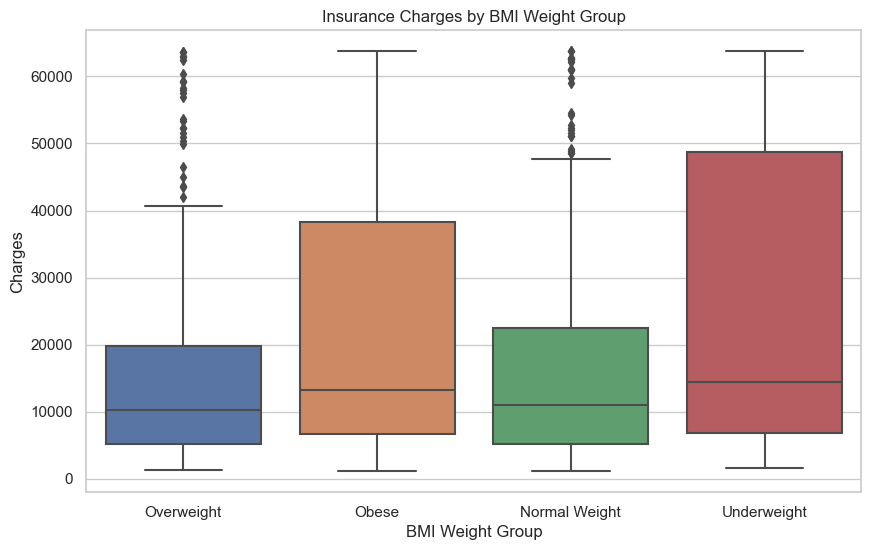

In [72]:
# Boxplot of Charges by BMI Weight Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_weight_label', y='charges', data=df_i)
plt.title('Insurance Charges by BMI Weight Group')
plt.xlabel('BMI Weight Group')
plt.ylabel('Charges')
plt.show()

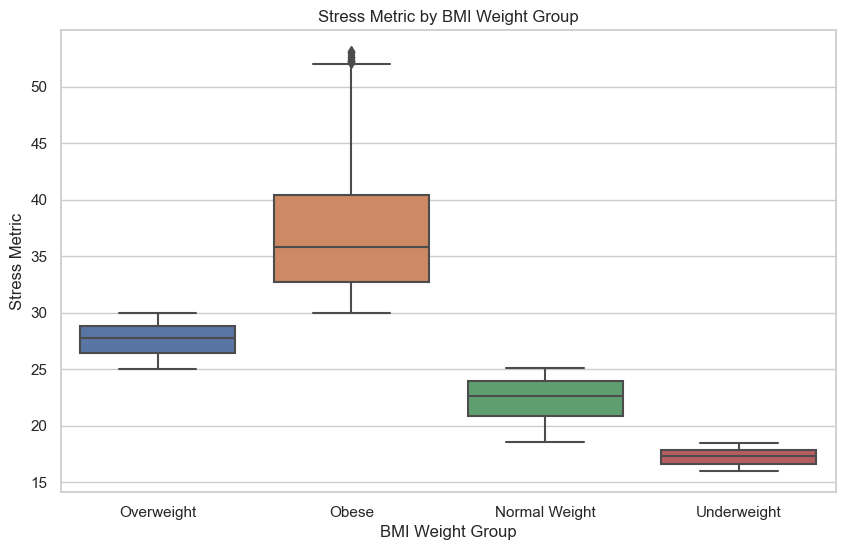

In [73]:
# Boxplot of Stress Metric by BMI weight group
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_weight_label', y='stress', data=df_i)
plt.title('Stress Metric by BMI Weight Group')
plt.xlabel('BMI Weight Group')
plt.ylabel('Stress Metric')
plt.show()

DISTRIBUTION PLOT

The distribution plot is used to visually assess the distribution and skewness of numerical variables in the DataFrame. This is especially useful for identifying data characteristics such as symmetry, peaks, tails, and skewness in the numerical columns.

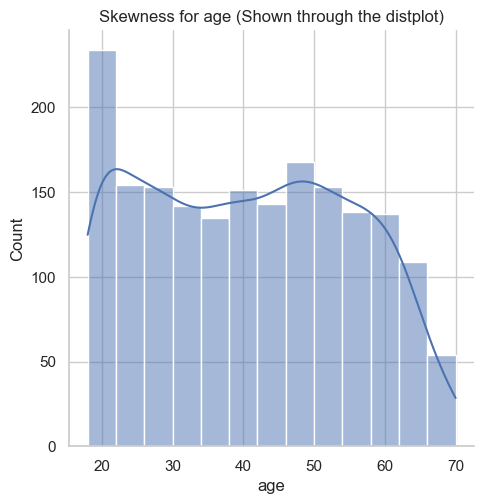

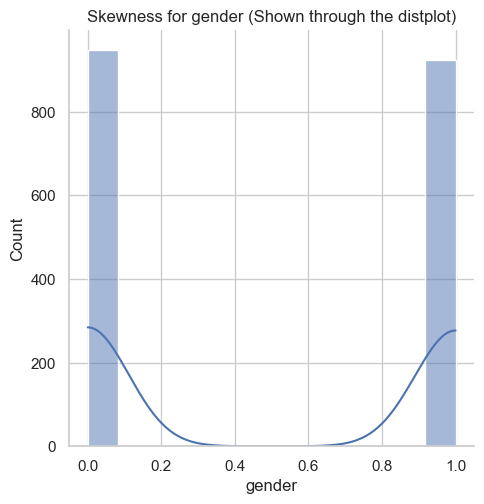

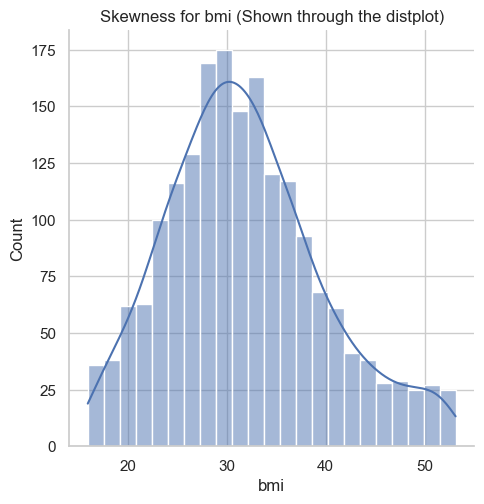

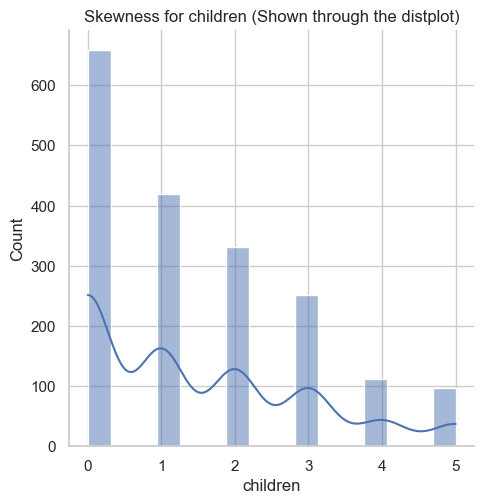

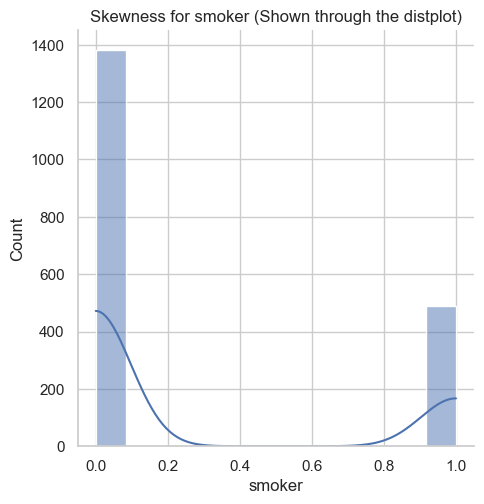

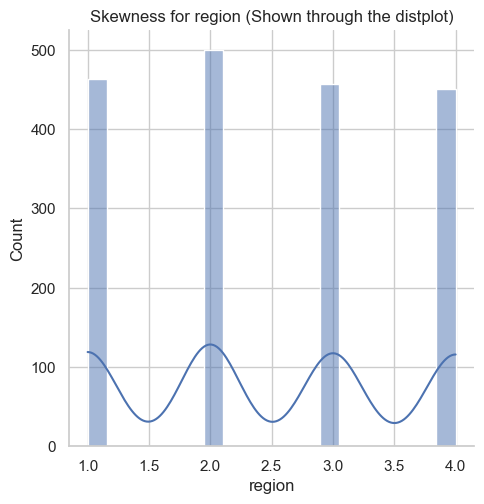

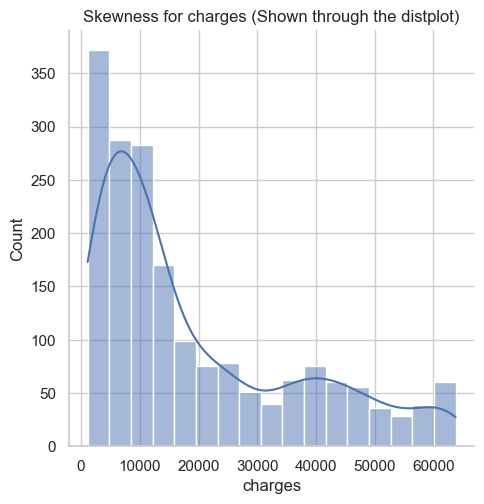

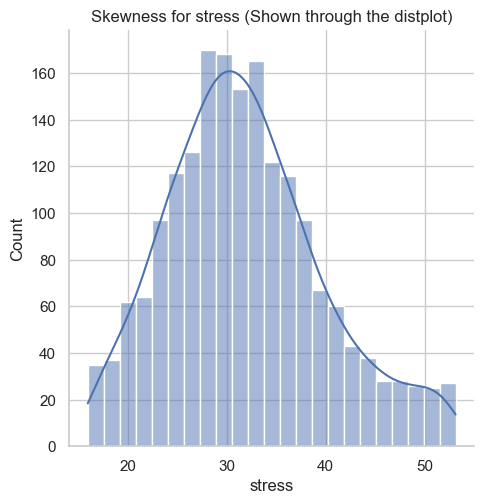

In [74]:
# Iterate through numerical columns in the DataFrame
for col in df_i.columns:
    if df_i[col].dtype != 'object':  # Consider only numerical columns
         # Create a distribution plot with KDE to visualize data distribution and skewness
        sns.displot(df_i[col], kde=True)
        plt.title(f'Skewness for {col} (Shown through the distplot)')
        plt.show()

This code categorizes 'adult_group' for modeling and analyzes the distribution of charges among smokers and non-smokers, helping to assess how they differ in terms of insurance premium charges.

In [75]:
# Convert the 'adult_group' column to a categorical data type
df_i['adult_group'] = df_i['adult_group'].astype('category')
# Convert the 'adult_group' column to numerical codes for predictive modeling
df_i['adult_group'] = df_i['adult_group'].cat.codes

# Calculate the mean value for charges
m_val = df_i['charges'].mean() 
# Separate data into different groups based on smoking status and charges
non_smoker_lc = df_i[(df_i['smoker'] == 0) & (df_i['charges'] < m_val)]
non_smoker_hc = df_i[(df_i['smoker'] == 0) & (df_i['charges'] > m_val)]
smoker_lc = df_i[(df_i['smoker'] == 1) & (df_i['charges'] < m_val)]
smoker_hc = df_i[(df_i['smoker'] == 1) & (df_i['charges'] > m_val)]

# Calculate the length of each group to get the count
len_non_smoker_lc = len(non_smoker_lc)
len_non_smoker_hc = len(non_smoker_hc)
len_smoker_lc = len(smoker_lc)
len_smoker_hc = len(smoker_hc)

# Calculate the difference between related values of smokers and non-smokers
diff_non = len_non_smoker_lc - len_non_smoker_hc
diff_smoker = len_smoker_lc - len_smoker_hc

# Print the results
print("Length of non-smoker with low charges:", len_non_smoker_lc)
print("Length of non-smoker with high charges:", len_non_smoker_hc)
print("Difference between non-smoker with low charges and non smoker high charges:", diff_non)

print("Length of smoker with low charges:", len_smoker_lc)
print("Length of smoker with high charges:", len_smoker_hc)
print("Difference between smoker with low charges and smoker with high charges:", diff_smoker)


Length of non-smoker with low charges: 1106
Length of non-smoker with high charges: 276
Difference between non-smoker with low charges and non smoker high charges: 830
Length of smoker with low charges: 97
Length of smoker with high charges: 392
Difference between smoker with low charges and smoker with high charges: -295


This code creates a stacked bar plot to visually compare insurance premium charges between smokers and non-smokers for both low and high charge categories, enabling a clear visualization of the differences in charge distributions.

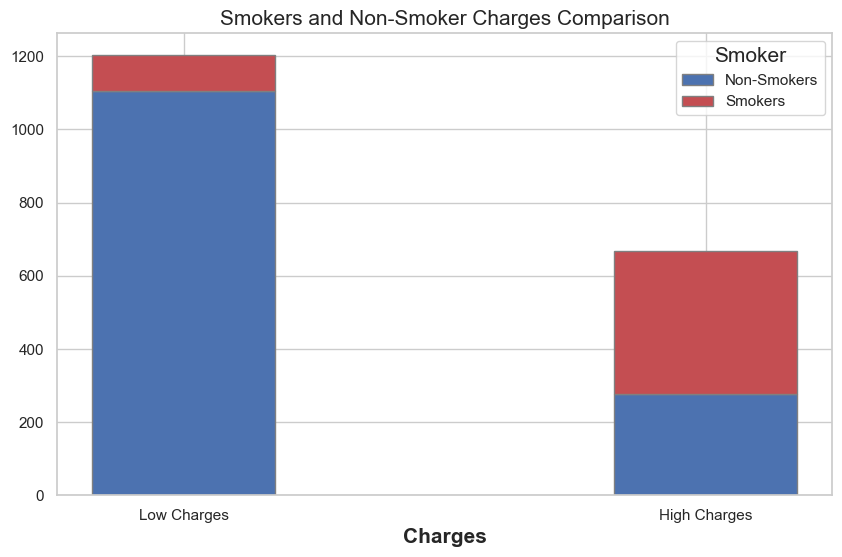

In [76]:
# Create lists to store counts of non-smokers and smokers for low and high charges
non_smokers = [len_non_smoker_lc, len_non_smoker_hc]
smokers = [len_smoker_lc, len_smoker_hc]

# Create a bar plot to compare charges for smokers and non-smokers
plt.figure(figsize=(10, 6))
barWidth = 0.35
r1 = [0,1]

# Plot bars for non-smokers and smokers, stacked to compare charges
plt.bar(r1, non_smokers, color='b', width=barWidth, edgecolor='grey', label='Non-Smokers')
plt.bar(r1, smokers, color='r', width=barWidth, edgecolor='grey', label='Smokers', bottom=non_smokers)

# Set plot labels and titles
plt.xlabel('Charges', fontweight='bold', fontsize=15)
plt.xticks([0, 1], ['Low Charges', 'High Charges'])
plt.title('Smokers and Non-Smoker Charges Comparison', fontsize=15)
plt.legend()
plt.xticks(r1, ['Low Charges', 'High Charges'])
plt.legend(loc='upper right')
plt.legend(title='Smoker', title_fontsize='15')
# Display the bar plot
plt.show()

Correlation Matrix

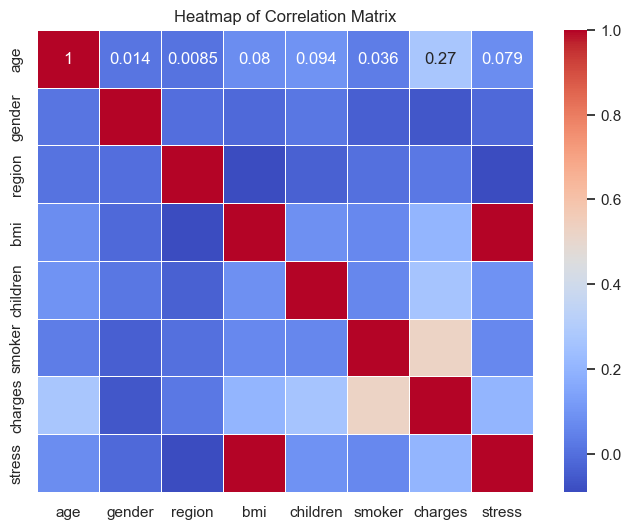

In [77]:
# Compute the correlation matrix
corr_matrix = df_i[['age', 'gender', 'region', 'bmi', 'children', 'smoker', 'charges', 'stress']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

BMI Weight Groups by Smoker Status:
This code generates a count plot illustrating the distribution of individuals across BMI weight groups based on their smoker status.
The plot provides a visual comparison of how individuals in different BMI weight categories are distributed among smokers and non-smokers. It helps in understanding the relationship between BMI weight groups and smoker status.

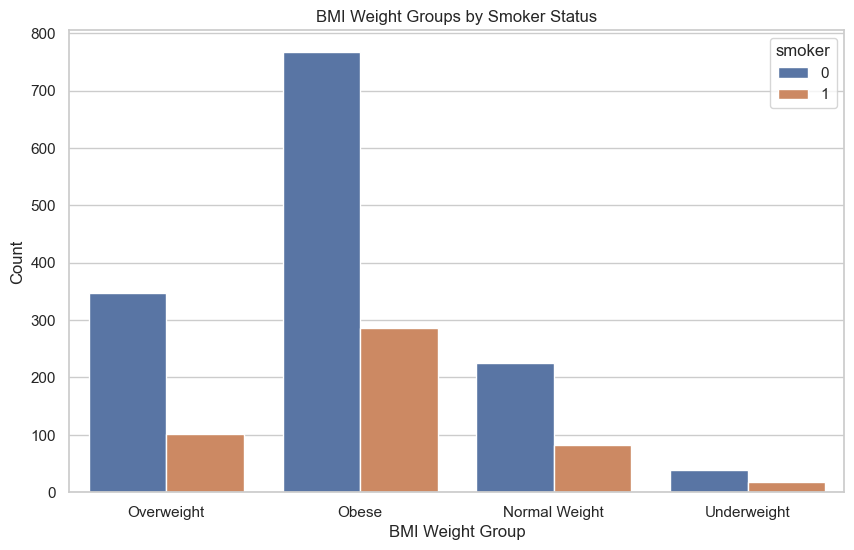

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_weight_label', hue='smoker', data=df_i)
plt.title('BMI Weight Groups by Smoker Status')
plt.xlabel('BMI Weight Group')
plt.ylabel('Count')
plt.show()
